In [1]:
#NORMAL IMPORTS
import numpy as np
from numpy.random import randn
import pandas as pd

#STATS
from scipy import stats

#VISUALIZATION
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

(0.0, 1.0)

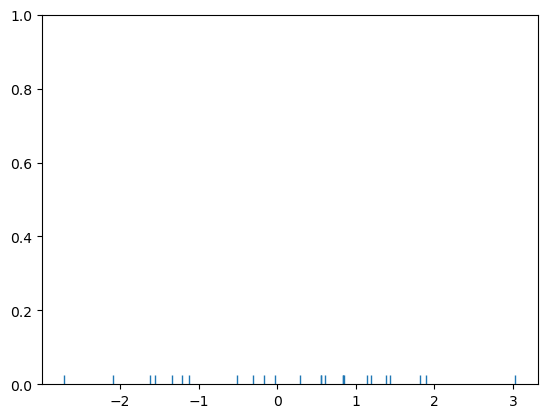

In [3]:
sns.rugplot(dataset)
plt.ylim(0,1)

<Axes: >

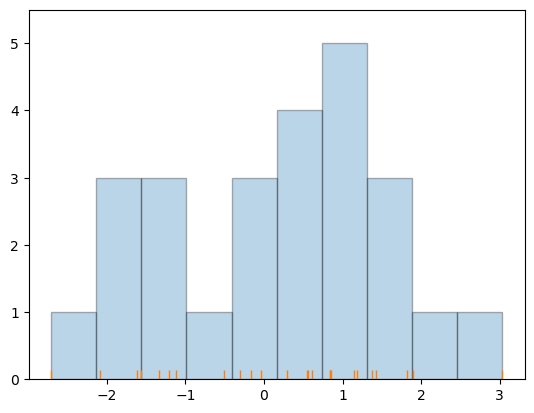

In [4]:
plt.hist(dataset, alpha=0.3, edgecolor='black')
sns.rugplot(dataset)

(0.0, 1.0)

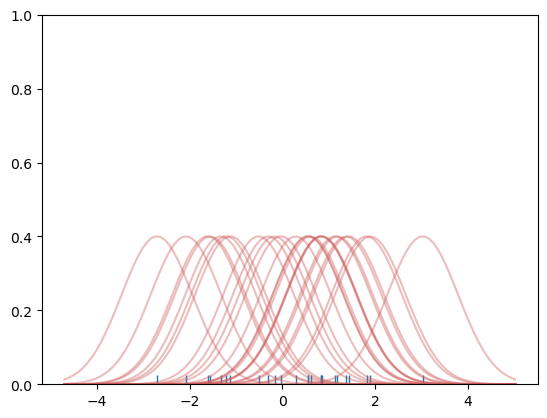

In [13]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:

    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4

    plt.plot(x_axis, kernel, color='indianred', alpha=0.4)

plt.ylim(0, 1)

Text(0.5, 0.98, 'sum of basis functions')

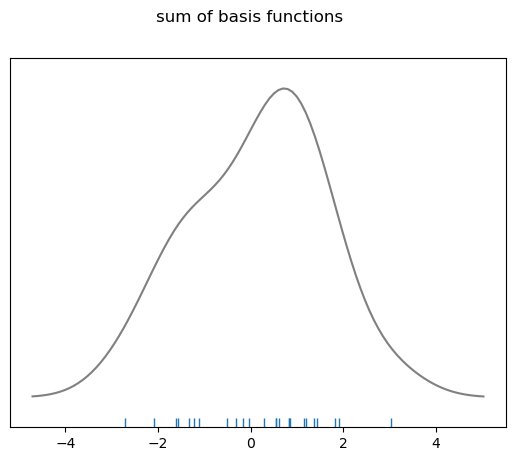

In [17]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde,color="grey")

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("sum of basis functions")

<Axes: ylabel='Density'>

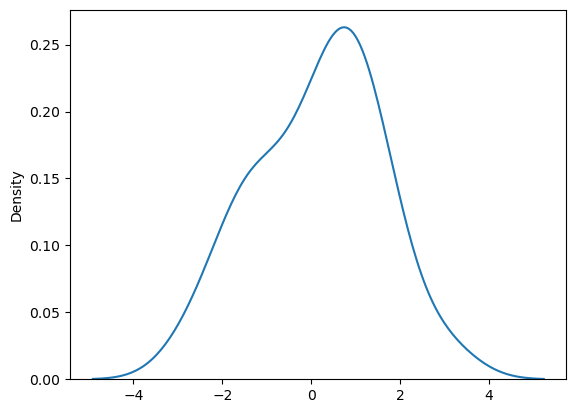

In [19]:
sns.kdeplot(dataset)

C:\Users\kodur\AppData\Local\Temp\ipykernel_4404\2155549582.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)
C:\Users\kodur\AppData\Local\Temp\ipykernel_4404\2155549582.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)
C:\Users\kodur\AppData\Local\Temp\ipykernel_4404\2155549582.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(d

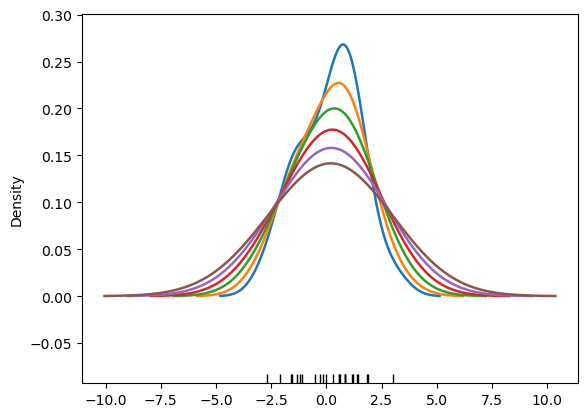

In [21]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

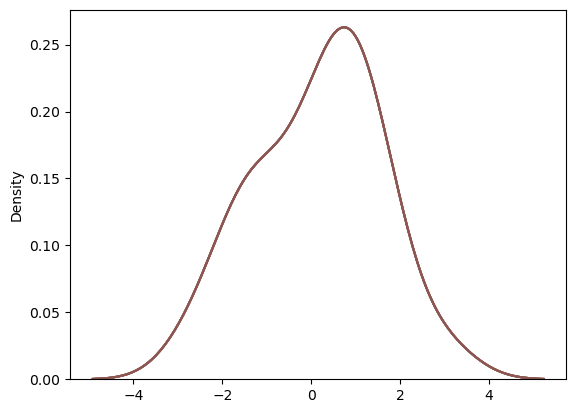

In [32]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, label=kern)

<Axes: xlabel='Density'>

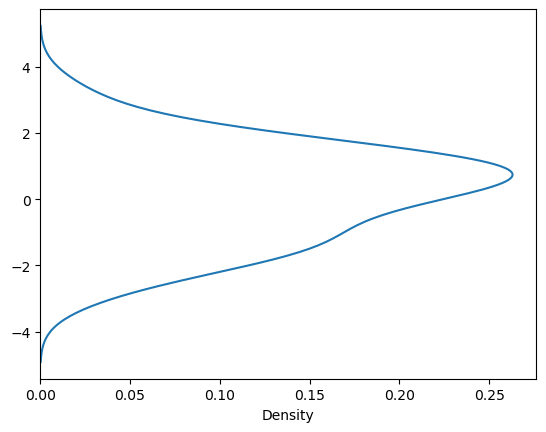

In [40]:
# sns.kdeplot(dataset, vertical = True)
sns.kdeplot(y=dataset)

<Axes: ylabel='Density'>

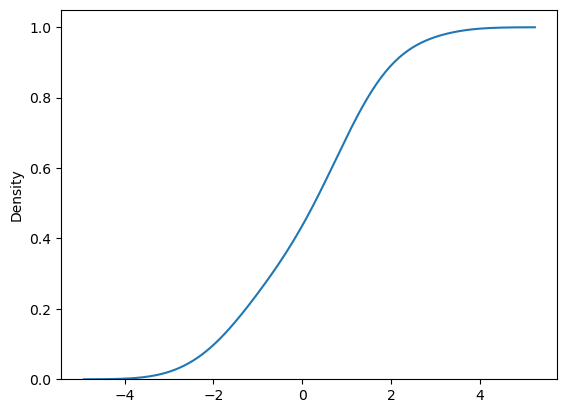

In [44]:
# cummilative data frequency
sns.kdeplot(dataset,cumulative = True)

C:\Users\kodur\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


<Axes: xlabel='x', ylabel='y'>

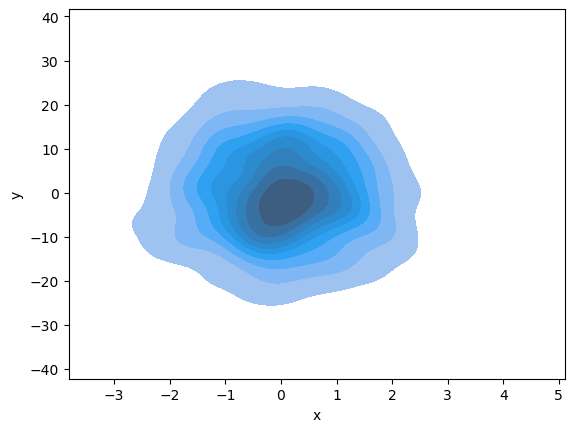

In [58]:
mean = [0, 0]

cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['x','y'])

sns.kdeplot(x=dframe['x'], y=dframe['y'], fill=True, edgecolor='black')

<Axes: xlabel='x', ylabel='y'>

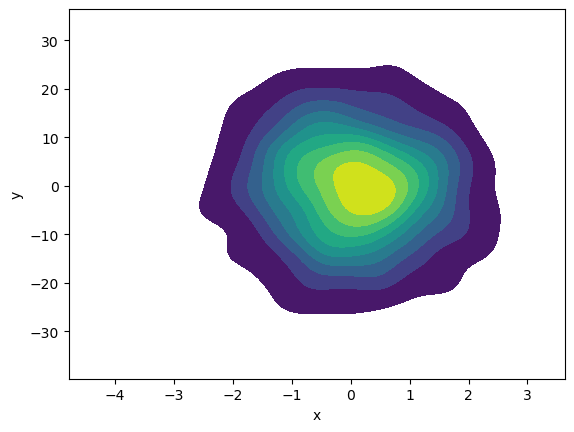

In [56]:
sns.kdeplot(x=dframe['x'], y=dframe['y'], fill=True, cmap='viridis')

<Axes: xlabel='x', ylabel='y'>

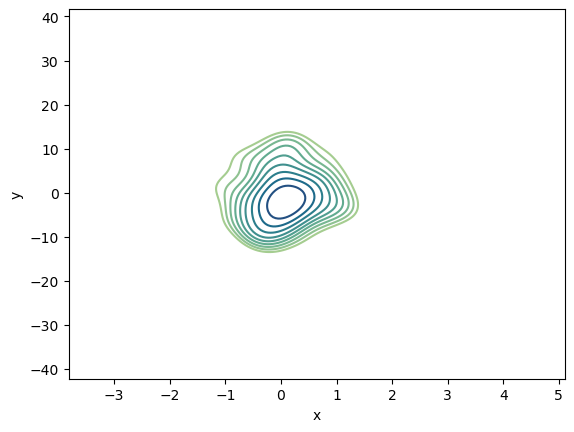

In [66]:
sns.kdeplot(x=dframe['x'], y=dframe['y'], cmap = 'crest', thresh=0.5, levels=10)

C:\Users\kodur\AppData\Local\Temp\ipykernel_4404\1986017670.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x=dframe['x'], y=dframe['y'], bw=1)


<Axes: xlabel='x', ylabel='y'>

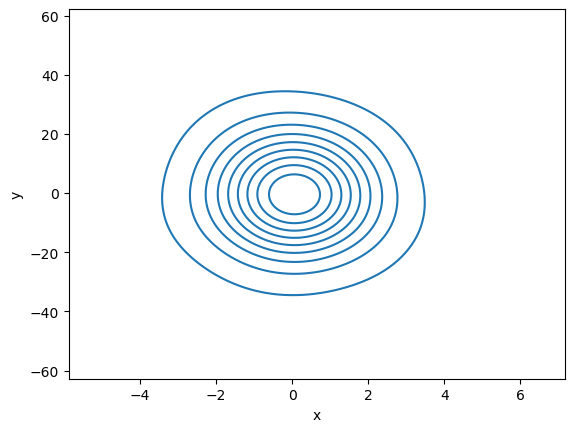

In [70]:
sns.kdeplot(x=dframe['x'], y=dframe['y'], bw=1)

C:\Users\kodur\AppData\Local\Temp\ipykernel_4404\4272267843.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x=dframe['x'], y=dframe['y'], bw='silverman')


<Axes: xlabel='x', ylabel='y'>

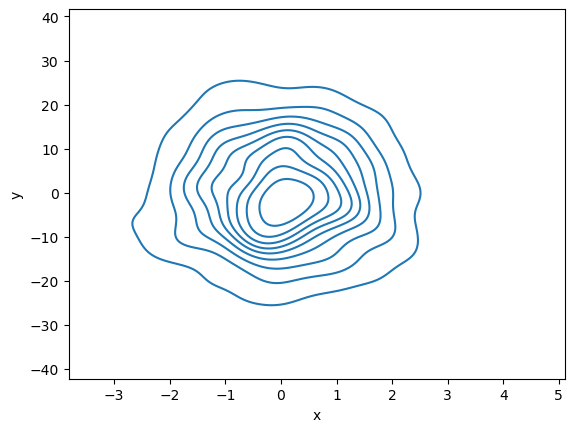

In [72]:
sns.kdeplot(x=dframe['x'], y=dframe['y'], bw='silverman')

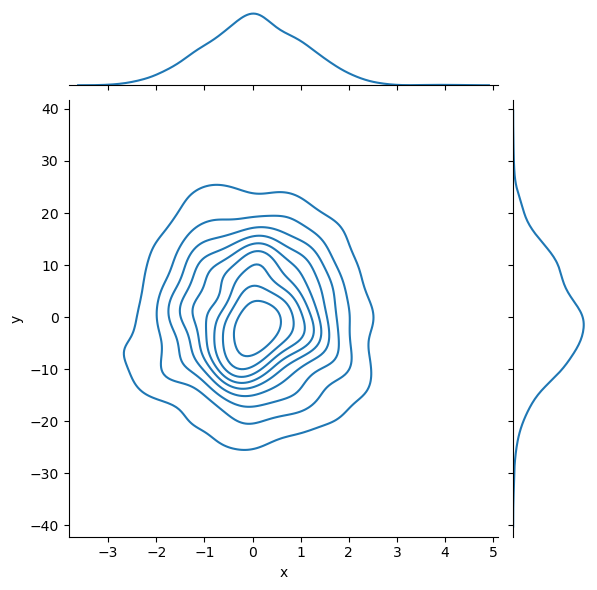

In [82]:
sns.jointplot(x='x',y='y', data=dframe,kind='kde')